# Data set review & preparation

In [1]:
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# Read the data frame
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.shape

(10000, 14)

### The dataset comprises 1,000 rows and encompasses 14 attributes. We will conduct a detailed examination to determine which attributes are essential and to plan the necessary data preprocessing steps before embarking on exploratory analysis and predictive modeling.

In [6]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###  There are no missing values in the dataset

In [7]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Based on the previous information, we will exclude the first two attributes since they are specific to individual customers. Additionally, we will also omit the surname attribute as it could potentially lead to profiling concerns.

In [8]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
# Review the top rows from the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Our dataset primarily consists of categorical variables, with 5 continuous variables included.

# Exploratory Data Analysis

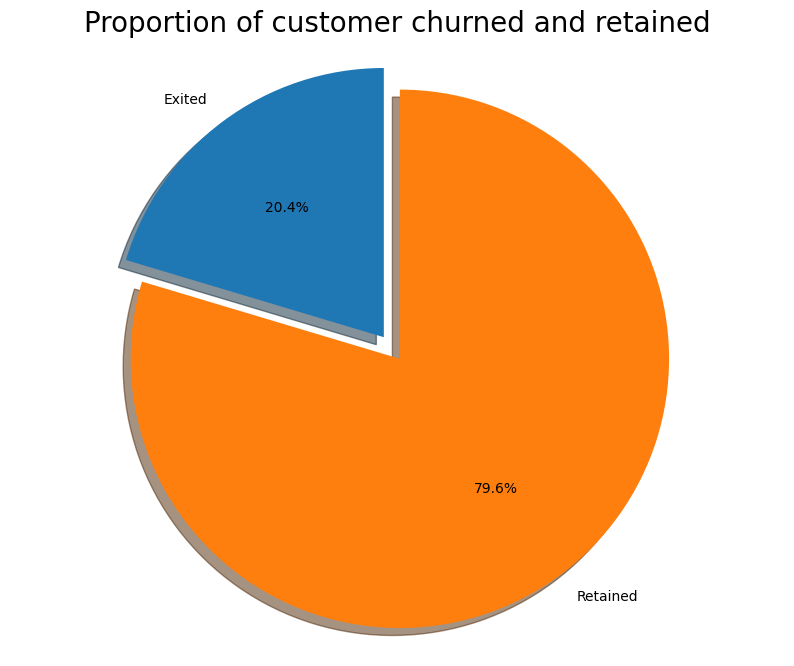

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### With approximately 20% of customers having churned, a reasonable baseline model could involve predicting that 20% of customers will churn. Given that this 20% represents a relatively small proportion of the dataset, it's crucial to ensure that the chosen model has a high level of accuracy when identifying this group. The primary focus is on accurately predicting the customers who have churned, as it is of great importance to the bank to retain this particular segment rather than prioritizing accuracy in predicting the customers who are retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

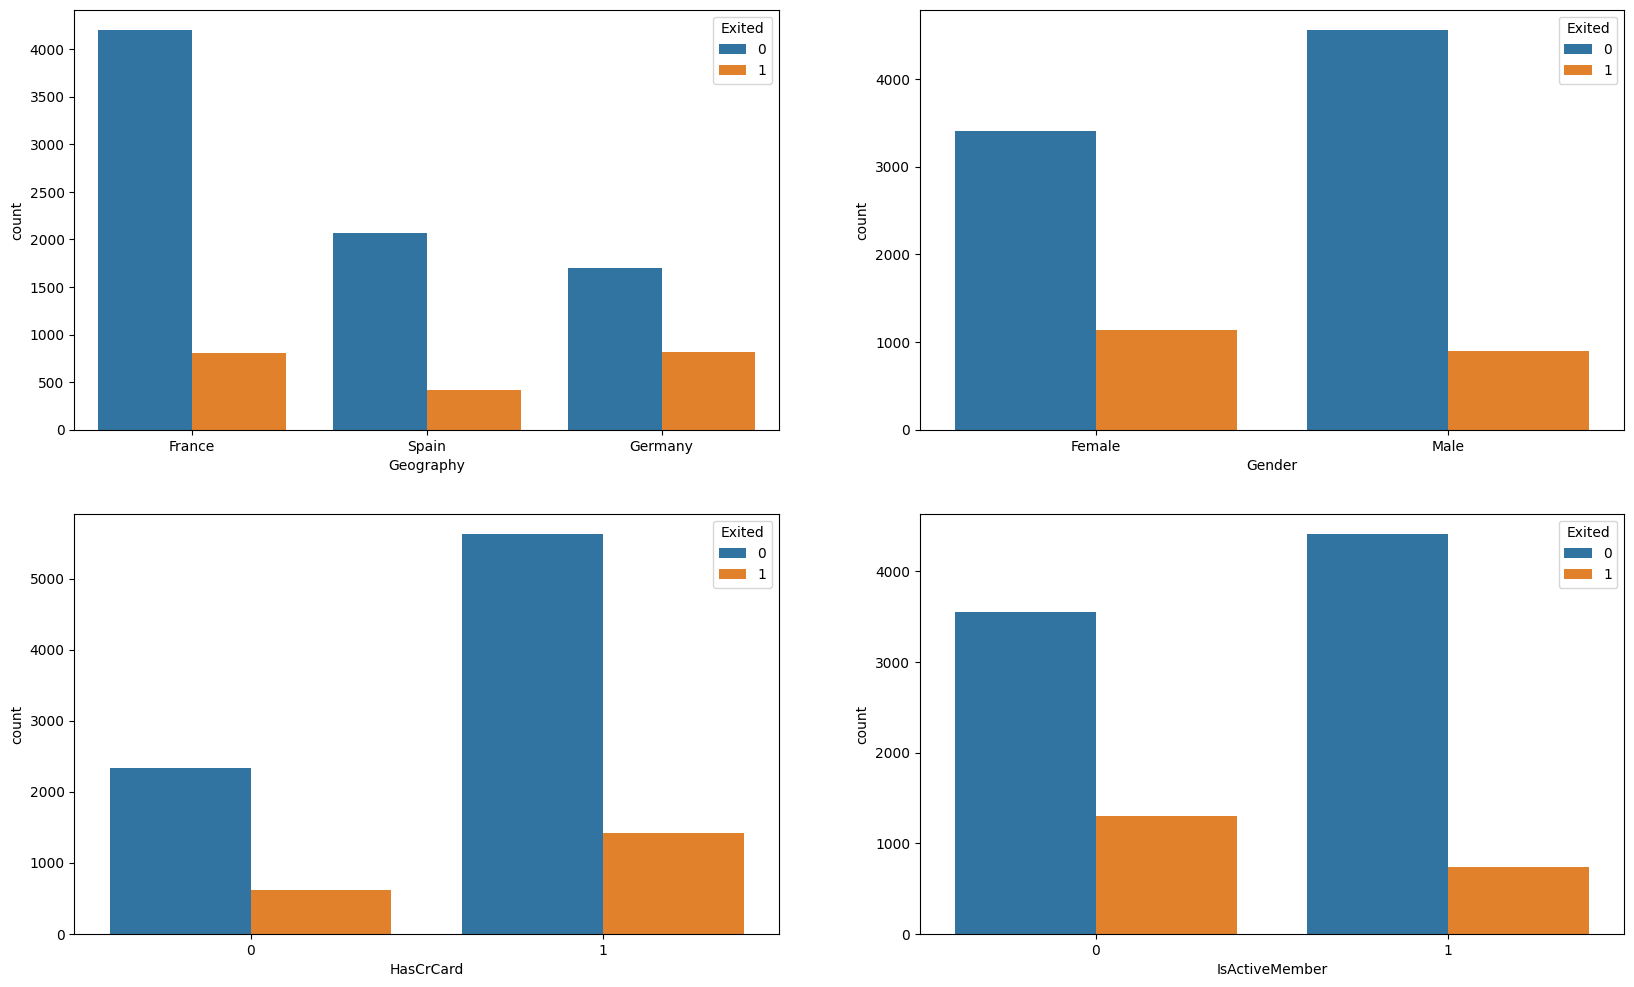

In [13]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Observations :

1. The majority of the data represents customers from France. However, the proportion of churned customers is inversely related to the population of customers, suggesting the possibility of a problem within areas where there are fewer clients. This might indicate a potential issue with the allocation of customer service resources.

2. The proportion of female customers who have churned is greater than that of male customers.

3. Interestingly, a significant number of customers who churned had credit cards. Given that a majority of the customers also have credit cards, this could be a coincidence, but it's worth investigating further.

4. It's not surprising that inactive members have a higher churn rate. What's concerning is that the overall proportion of inactive members is quite high. This suggests that implementing a program to convert inactive members into active customers could have a positive impact on reducing customer churn.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

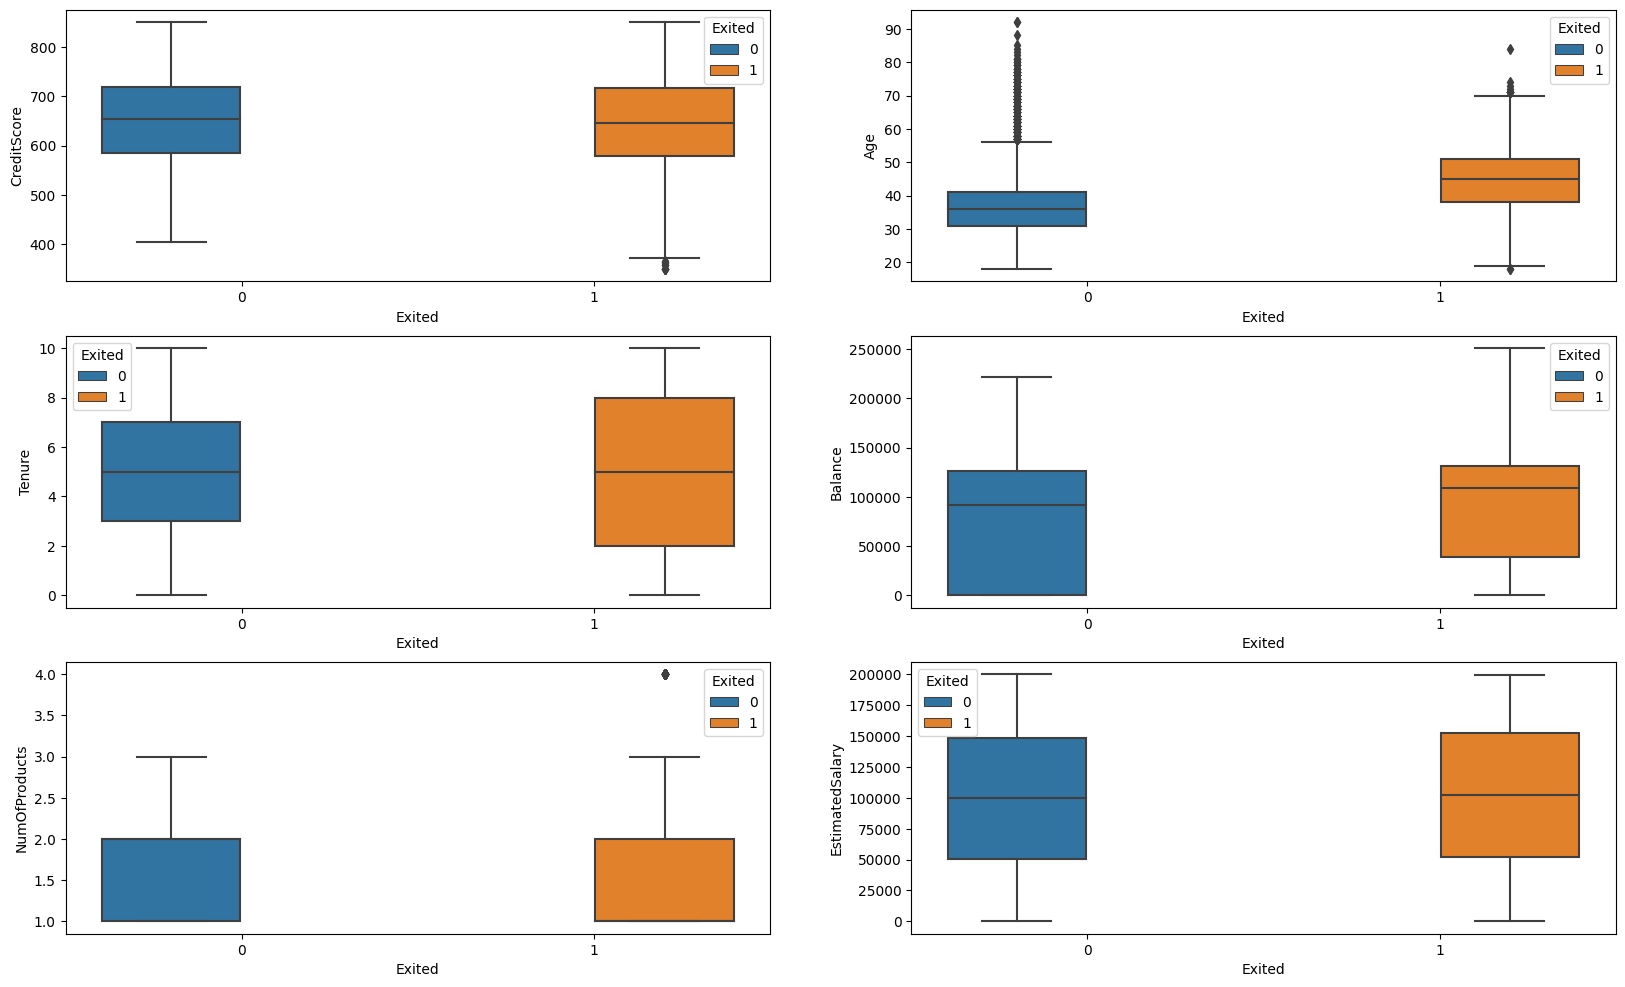

In [14]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### observations:

There doesn't appear to be a significant difference in the credit score distribution between retained and churned customers.

Older customers are more likely to churn compared to younger ones. This suggests a difference in service preference among age categories. The bank may need to review its target market or adjust its retention strategies for different age groups.

Regarding tenure, customers at the extremes (those who have spent very little time with the bank or those with a long history) are more likely to churn compared to those with an average tenure. This highlights the importance of engaging with customers who fall into these extreme categories.

The bank is losing customers with significant bank balances, which could impact its available capital for lending. This is a concerning trend that should be addressed.

Neither the product nor the salary of the customers seems to have a significant effect on the likelihood to churn, suggesting that these factors may not be key drivers of customer attrition.

<ipython-input-53-db715f91f4d0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


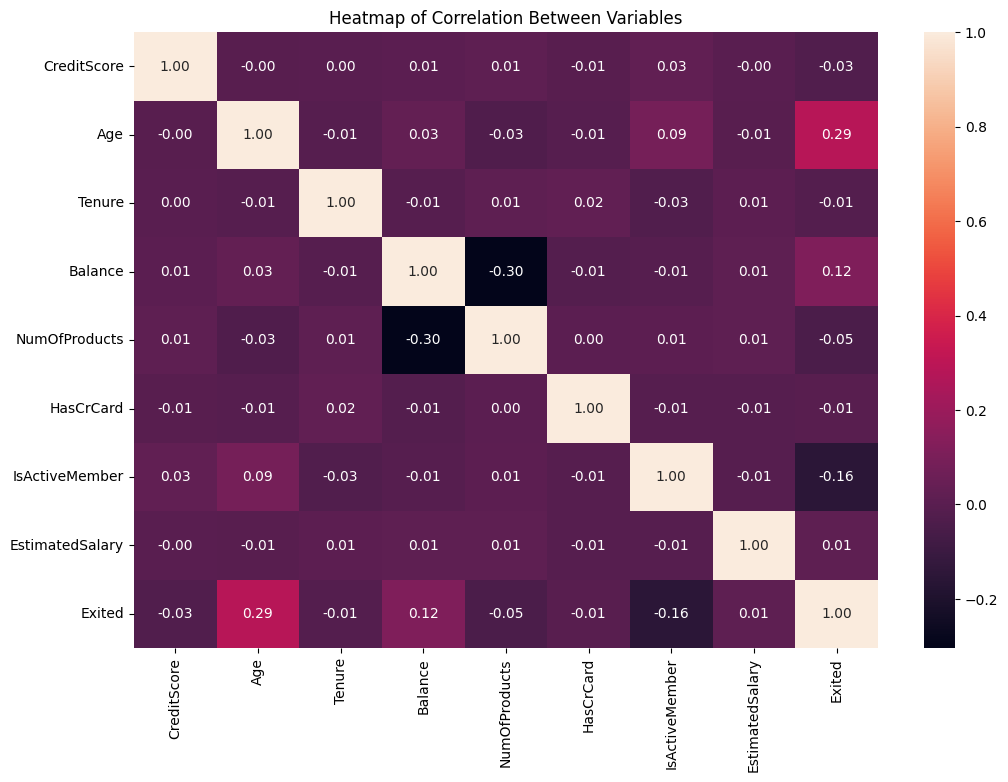

In [53]:
# HeatMap to visualize the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Heatmap of Correlation Between Variables")
plt.show()

### Based on the heatmap, the most prominent features related to churn appear to be 'Age' and 'IsActiveMember', with 'Balance' also playing a role. It would be advisable for the bank to look into these features when designing customer retention or engagement strategies. For instance, special attention could be given to older customers and efforts could be made to increase customer activity with the bank. However, it's important to consider that correlation does not imply causation, and further analysis, such as predictive modeling, is necessary to draw more concrete conclusions.

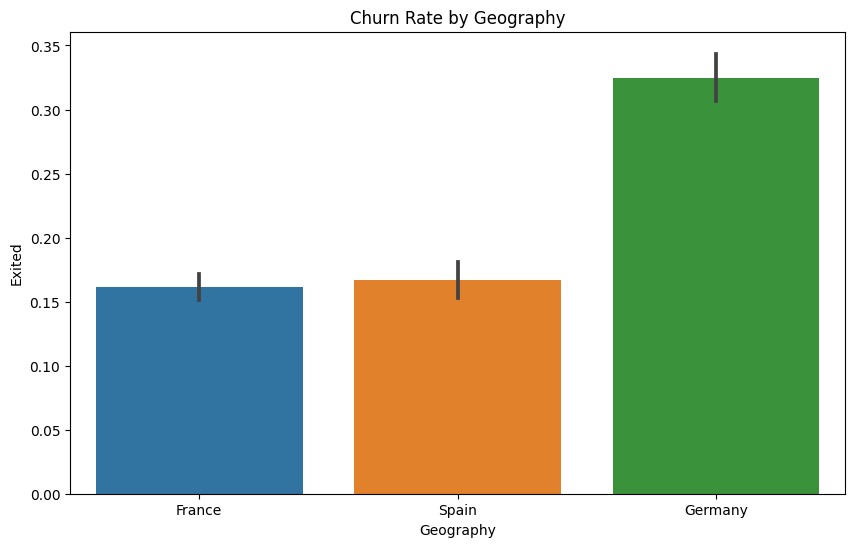

In [55]:
# Bar Plot for categorical variables like customer segments and their churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x="Geography", y="Exited", data=df)
plt.title("Churn Rate by Geography")
plt.show()

### The bar chart depicts churn rates by geography, showing that Germany has the highest churn rate at over 30%, followed by Spain with a moderate churn rate, and France with the lowest churn rate around 15-20%. This suggests that customer retention strategies in Germany may need revisiting, while the approaches in France seem to be more effective. The error bars indicate variability in these rates, with Germany having the most significant variability, which could imply data inconsistency or diverse customer behavior in that region.

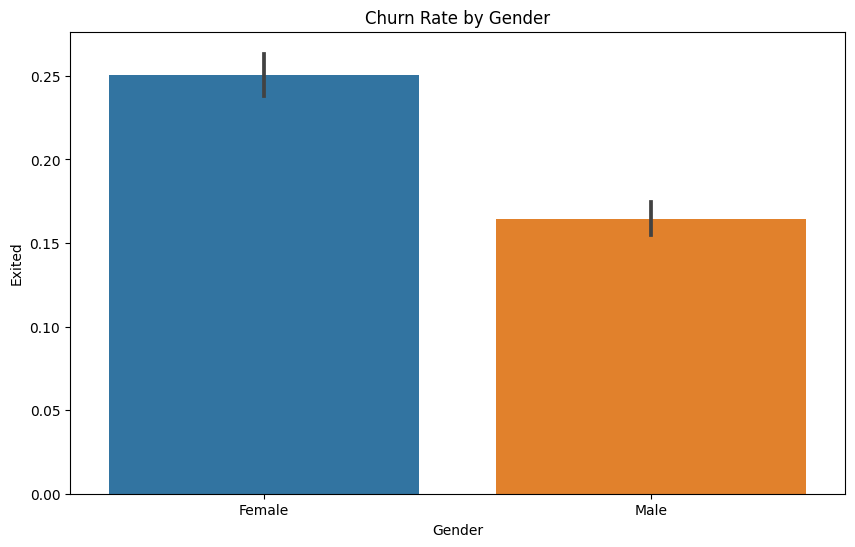

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Gender", y="Exited", data=df)
plt.title("Churn Rate by Gender")
plt.show()

###  The bar chart represents the churn rate by gender, indicating a higher churn rate among females compared to males. Females show a churn rate above 20%, while the churn rate for males is slightly lower, just under 20%. The error bars suggest some variability in the churn rates for both genders, with the female category showing a slightly larger variation. This could point towards gender-specific factors influencing churn, suggesting the need for tailored customer retention strategies for different genders.

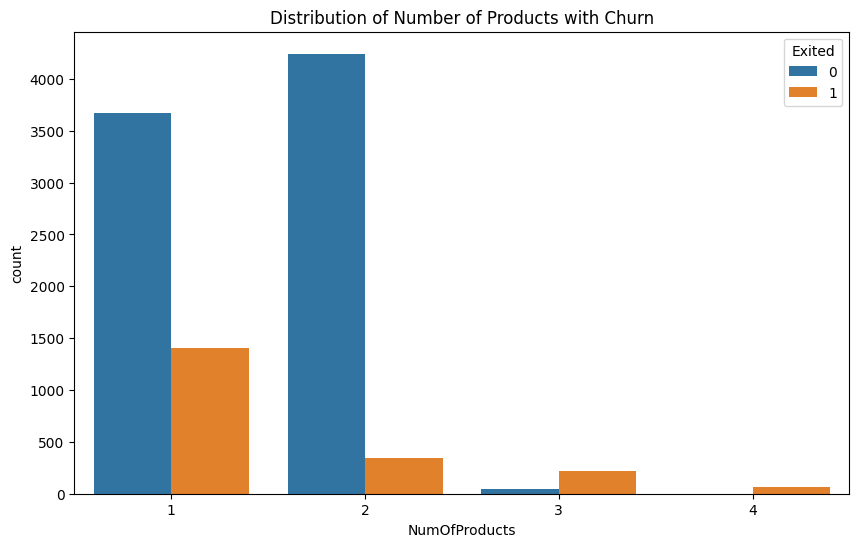

In [57]:
# Count Plot to visualize the distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Distribution of Number of Products with Churn")
plt.show()

### The chart shows customer churn by the number of bank products held. Customers with one product have a higher churn rate, while those with two products seem to be more retained. However, customers with three or four products exhibit increased churn. This suggests that while having multiple products can enhance customer retention, there might be a threshold after which additional products do not add value and might even lead to increased churn.

<ipython-input-58-e6fb9789a792>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"][df["Exited"] == 1], bins=20, label="Exited")
<ipython-input-58-e6fb9789a792>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"][df["Exited"] == 0], bins=20, label="Retained")


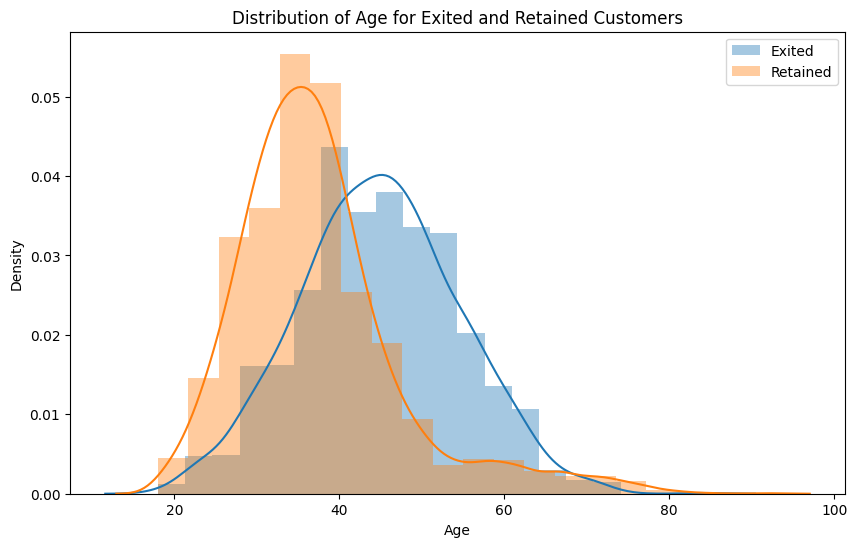

In [58]:
# Distribution Plot to understand the distribution of numeric features
plt.figure(figsize=(10, 6))
sns.distplot(df["Age"][df["Exited"] == 1], bins=20, label="Exited")
sns.distplot(df["Age"][df["Exited"] == 0], bins=20, label="Retained")
plt.title("Distribution of Age for Exited and Retained Customers")
plt.legend()
plt.show()

### The distribution plot indicates that middle-aged customers (late 40s to early 50s) are more likely to churn, while a broader age range of younger customers tends to remain with the bank. This suggests that the bank should focus retention strategies on the middle-aged demographic to reduce churn rates.

# Feature engineering

In [15]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

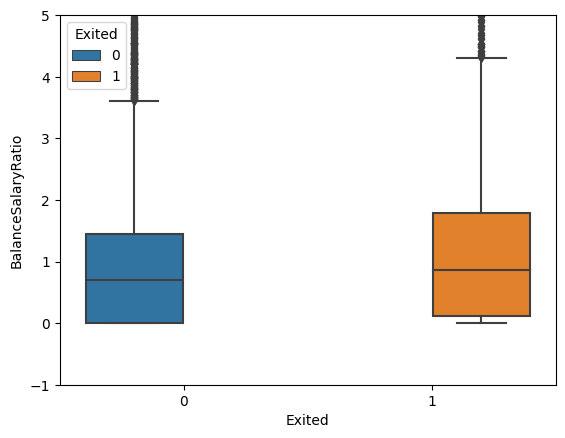

In [16]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

### While it's true that salary alone doesn't seem to have a significant effect on the likelihood of a customer churning, it's important to note that the ratio of a customer's bank balance to their estimated salary indicates that those with a higher balance-to-salary ratio are more likely to churn. This finding is concerning for the bank because it suggests that customers with a relatively higher financial capacity are churning, which could impact the bank's source of loan capital. This insight underscores the need for the bank to further investigate and address the factors driving this trend to mitigate potential adverse effects on its lending capabilities.

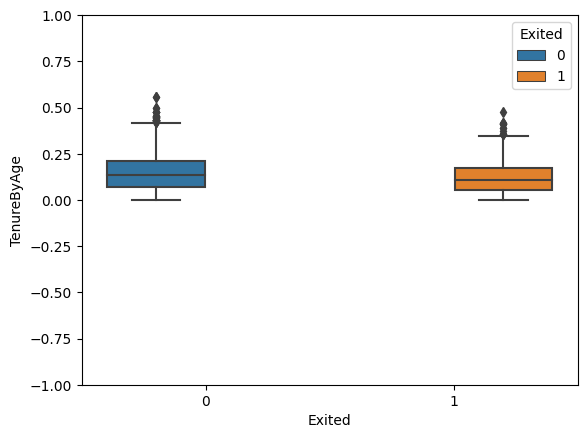

In [17]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [18]:
# Finally, we introduce a new variable that takes into account the credit score in relation to a customer's age. This variable is designed to capture and assess credit behavior throughout different stages of an individual's adult life, providing a more comprehensive understanding of how creditworthiness evolves over time.

df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [19]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


# Data prep for model fitting

In [20]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [21]:
# For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [22]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-22-2030c0db8e95>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-22-2030c0db8e95>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-22-2030c0db8e95>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence 

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [23]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [24]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

# Model fitting and selection

In [43]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [44]:

# Separating features and target variable
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model Evaluation


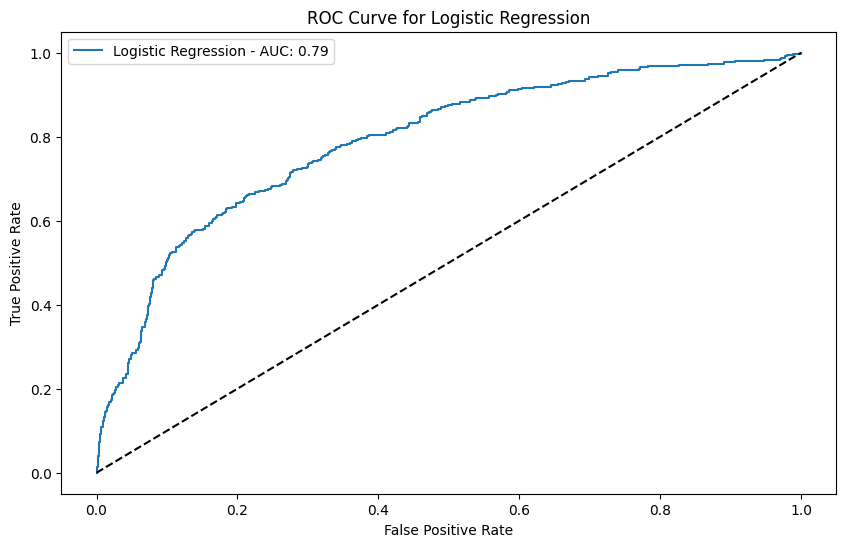

Logistic Regression Training Accuracy: 0.82
Logistic Regression Test Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1254
           1       0.61      0.21      0.32       346

    accuracy                           0.80      1600
   macro avg       0.71      0.59      0.60      1600
weighted avg       0.77      0.80      0.76      1600



In [49]:
# Logistic Regression Model
print("Logistic Regression Model Evaluation")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
log_reg_train_predictions = log_reg.predict(X_train)
log_reg_test_predictions = log_reg.predict(X_test)

# Calculating accuracies
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_predictions)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_predictions)

# ROC-AUC score and curve
log_reg_probabilities = log_reg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_probabilities)
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probabilities)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression - AUC: {log_reg_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Print classification report and accuracies
print(f'Logistic Regression Training Accuracy: {log_reg_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {log_reg_test_accuracy:.2f}')
print(classification_report(y_test, log_reg_test_predictions))


Decision Tree Model Evaluation


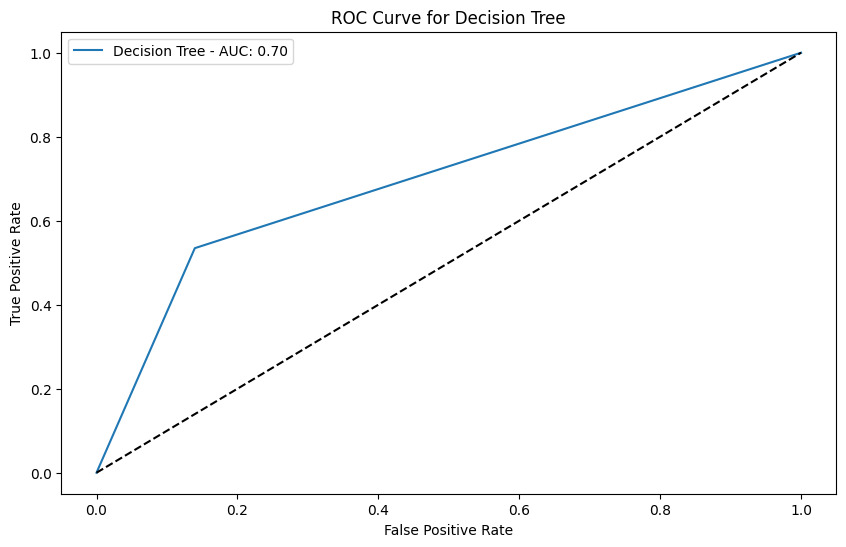

Decision Tree Training Accuracy: 1.00
Decision Tree Test Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1254
           1       0.51      0.53      0.52       346

    accuracy                           0.79      1600
   macro avg       0.69      0.70      0.69      1600
weighted avg       0.79      0.79      0.79      1600



In [50]:
# Decision Tree Model
print("Decision Tree Model Evaluation")
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Making predictions
decision_tree_train_predictions = decision_tree.predict(X_train)
decision_tree_test_predictions = decision_tree.predict(X_test)

# Calculating accuracies
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_predictions)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predictions)

# ROC-AUC score and curve
decision_tree_probabilities = decision_tree.predict_proba(X_test)[:, 1]
decision_tree_auc = roc_auc_score(y_test, decision_tree_probabilities)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probabilities)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree - AUC: {decision_tree_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Print classification report and accuracies
print(f'Decision Tree Training Accuracy: {decision_tree_train_accuracy:.2f}')
print(f'Decision Tree Test Accuracy: {decision_tree_test_accuracy:.2f}')
print(classification_report(y_test, decision_tree_test_predictions))


Random Forest Model Evaluation


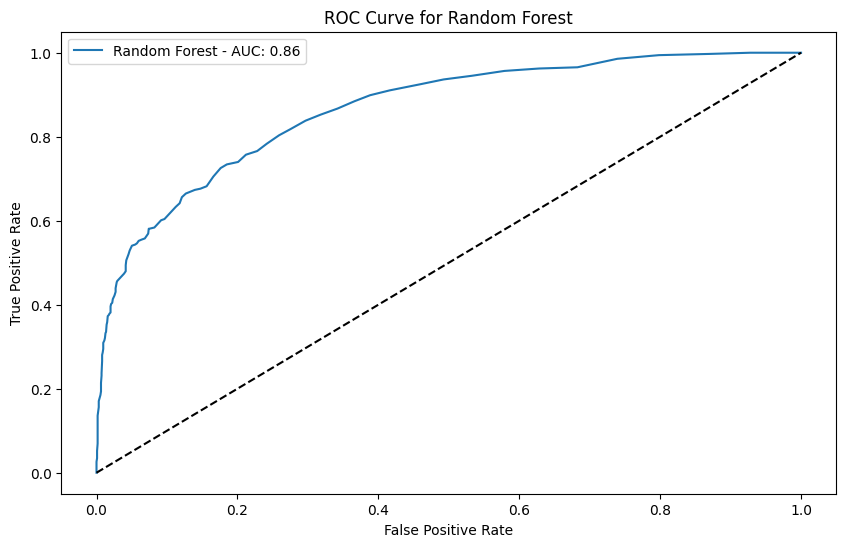

Random Forest Training Accuracy: 1.00
Random Forest Test Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1254
           1       0.77      0.47      0.59       346

    accuracy                           0.86      1600
   macro avg       0.82      0.72      0.75      1600
weighted avg       0.85      0.86      0.84      1600



In [51]:
# Random Forest Model
print("Random Forest Model Evaluation")
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Making predictions
random_forest_train_predictions = random_forest.predict(X_train)
random_forest_test_predictions = random_forest.predict(X_test)

# Calculating accuracies
random_forest_train_accuracy = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predictions)

# ROC-AUC score and curve
random_forest_probabilities = random_forest.predict_proba(X_test)[:, 1]
random_forest_auc = roc_auc_score(y_test, random_forest_probabilities)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probabilities)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest - AUC: {random_forest_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Print classification report and accuracies
print(f'Random Forest Training Accuracy: {random_forest_train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {random_forest_test_accuracy:.2f}')
print(classification_report(y_test, random_forest_test_predictions))


Gaussian Naive Bayes Model Evaluation


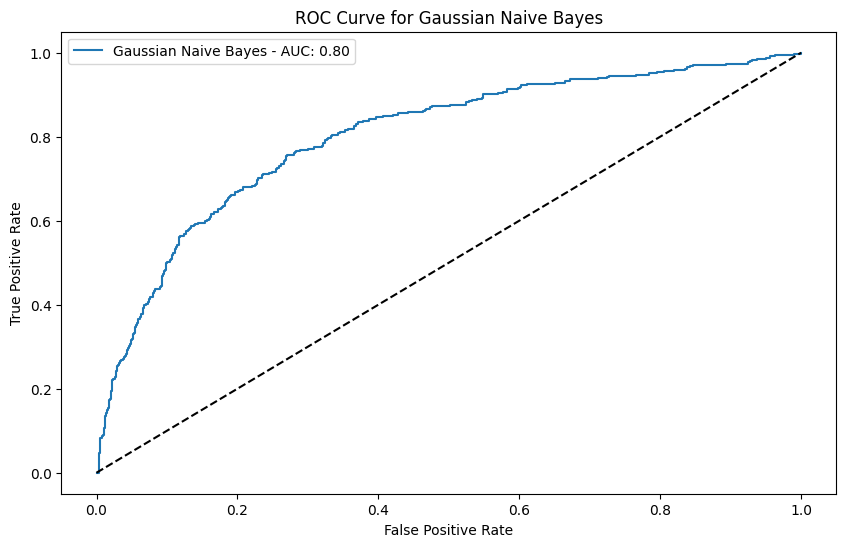

Gaussian Naive Bayes Training Accuracy: 0.82
Gaussian Naive Bayes Test Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1254
           1       0.63      0.31      0.41       346

    accuracy                           0.81      1600
   macro avg       0.73      0.63      0.65      1600
weighted avg       0.79      0.81      0.79      1600



In [52]:
# Gaussian Naive Bayes Model
print("Gaussian Naive Bayes Model Evaluation")
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Making predictions
gaussian_nb_train_predictions = gaussian_nb.predict(X_train)
gaussian_nb_test_predictions = gaussian_nb.predict(X_test)

# Calculating accuracies
gaussian_nb_train_accuracy = accuracy_score(y_train, gaussian_nb_train_predictions)
gaussian_nb_test_accuracy = accuracy_score(y_test, gaussian_nb_test_predictions)

# ROC-AUC score and curve
gaussian_nb_probabilities = gaussian_nb.predict_proba(X_test)[:, 1]
gaussian_nb_auc = roc_auc_score(y_test, gaussian_nb_probabilities)
gaussian_nb_fpr, gaussian_nb_tpr, _ = roc_curve(y_test, gaussian_nb_probabilities)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(gaussian_nb_fpr, gaussian_nb_tpr, label=f'Gaussian Naive Bayes - AUC: {gaussian_nb_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Print classification report and accuracies
print(f'Gaussian Naive Bayes Training Accuracy: {gaussian_nb_train_accuracy:.2f}')
print(f'Gaussian Naive Bayes Test Accuracy: {gaussian_nb_test_accuracy:.2f}')
print(classification_report(y_test, gaussian_nb_test_predictions))
